## **Emotion Detection in Twitter Posts using Natural Language Processing (NLP)**

**AIML Project**

**Problem Statement:** Implement Emotion Detection in Twitter Posts using NLP.
 
**Description:** Natural Language Processing is a form of AI that gives machines the ability to not just read, but to understand and interpret human language. With NLP, machines can make sense of written or spoken text and perform tasks including speech recognition, sentiment analysis, and automatic text summarization. In this project we are detecting the emotions from the Posts of Twitter using Natural Language Processing.

**Importing Libraries**

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx 
import matplotlib.pyplot as plt
import math
import string
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Dataset**

In [119]:
df = pd.read_csv(r"C:\Users\Kshitija\Downloads\df_emotions.csv")
df = df.drop('Unnamed: 0',axis=1)
df = df.rename(columns={'text':'Text','label':'Emotions'})
labels_dict = {0:'Sad', 1:'Happy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'}
df['Emotions'] = df['Emotions'].map(labels_dict )
df

,Text,Emotions
0,im feeling rather rotten so im not very ambiti...,Sad
1,im updating my blog because i feel shitty,Sad
2,i never make her separate from me because i do...,Sad
3,i left with my bouquet of red and yellow tulip...,Happy
4,i was feeling a little vain when i did this one,Sad
...,...,...
19995,im having ssa examination tomorrow in the morn...,Sad
19996,i constantly worry about their fight against n...,Happy
19997,i feel its important to share this info for th...,Happy
19998,i truly feel that if you are passionate enough...,Happy


**Statistical summary or descriptive statistics of dataset**

In [120]:
df.head(10) #returns the first 10 rows of the dataset

,Text,Emotions
0,im feeling rather rotten so im not very ambiti...,Sad
1,im updating my blog because i feel shitty,Sad
2,i never make her separate from me because i do...,Sad
3,i left with my bouquet of red and yellow tulip...,Happy
4,i was feeling a little vain when i did this one,Sad
5,i cant walk into a shop anywhere where i do no...,Fear
6,i felt anger when at the end of a telephone call,Anger
7,i explain why i clung to a relationship with a...,Happy
8,i like to have the same breathless feeling as ...,Happy
9,i jest i feel grumpy tired and pre menstrual w...,Anger


In [121]:
df.tail(10) #returns the last 10 rows of the dataset

,Text,Emotions
19990,i just feel too overwhelmed i can t see the fo...,Fear
19991,i cant help but feel sentimental about the fac...,Sad
19992,i feel i should make is how surprised but ente...,Surprise
19993,i feel so tortured by it,Anger
19994,i feel a bit rude leaving you hanging there fr...,Anger
19995,im having ssa examination tomorrow in the morn...,Sad
19996,i constantly worry about their fight against n...,Happy
19997,i feel its important to share this info for th...,Happy
19998,i truly feel that if you are passionate enough...,Happy
19999,i feel like i just wanna buy any cute make up ...,Happy


In [122]:
df.shape #returns the dimensions of the dataframe

(20000, 2)

In [123]:
df.describe() #returns count, mean, std, etc for each column

,Text,Emotions
count,20000,20000
unique,19948,6
top,i loved the feeling i got during an amazing sl...,Happy
freq,2,6760


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      20000 non-null  object
 1   Emotions  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [125]:
df.isnull().sum()

Text        0
Emotions    0
dtype: int64

In [126]:
df.Emotions.unique()

array(['Sad', 'Happy', 'Fear', 'Anger', 'Love', 'Surprise'], dtype=object)

Happy       6760
Sad         5797
Anger       2709
Fear        2373
Love        1642
Surprise     719
Name: Emotions, dtype: int64

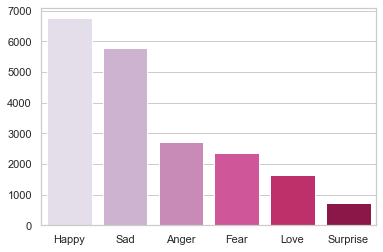

In [127]:
count_values = df['Emotions'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values, palette='PuRd')
count_values

In [128]:
df = df.drop_duplicates(keep="first") # Drop duplicated data and reindex the data
df_reidx = df.reset_index(drop=True)
df.shape

(19998, 2)

Happy       6759
Sad         5797
Anger       2709
Fear        2373
Love        1641
Surprise     719
Name: Emotions, dtype: int64

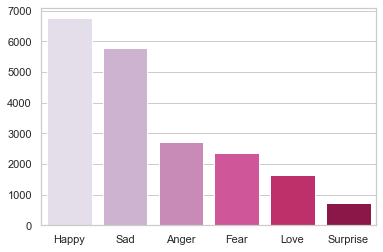

In [129]:
count_values = df['Emotions'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values, palette='PuRd')
count_values

In [130]:
fig = px.bar(x=count_values.index,y=count_values.values)
fig.show()

In [131]:
df_reidx['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx['length'].describe() # info()

count    19998.000000
mean        96.671267
std         55.780126
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: length, dtype: float64

In [132]:
df_reidx.head(10)

,Text,Emotions,length
0,im feeling rather rotten so im not very ambiti...,Sad,59
1,im updating my blog because i feel shitty,Sad,41
2,i never make her separate from me because i do...,Sad,97
3,i left with my bouquet of red and yellow tulip...,Happy,113
4,i was feeling a little vain when i did this one,Sad,47
5,i cant walk into a shop anywhere where i do no...,Fear,66
6,i felt anger when at the end of a telephone call,Anger,48
7,i explain why i clung to a relationship with a...,Happy,222
8,i like to have the same breathless feeling as ...,Happy,89
9,i jest i feel grumpy tired and pre menstrual w...,Anger,159


**Data Exploration and Visualisation**

In [133]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");

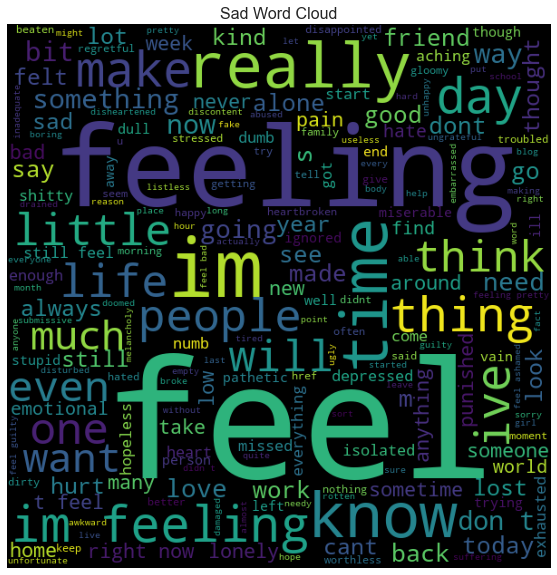

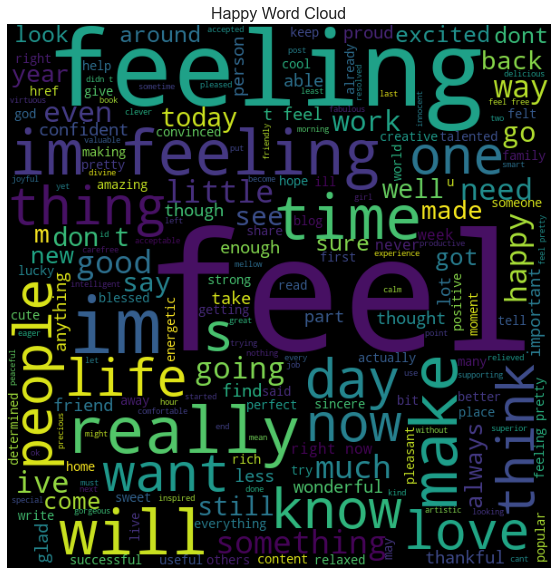

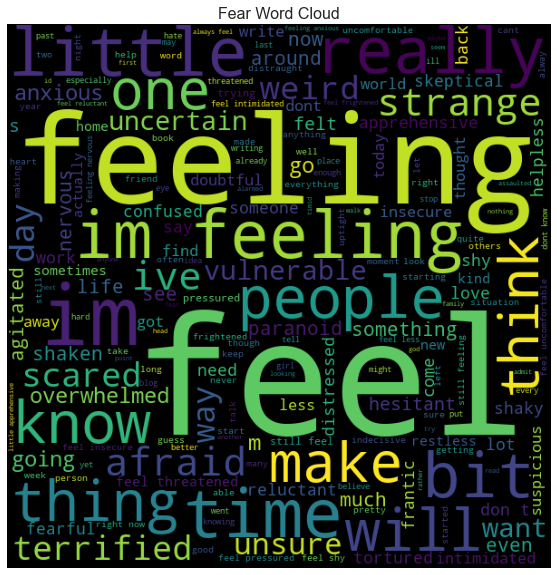

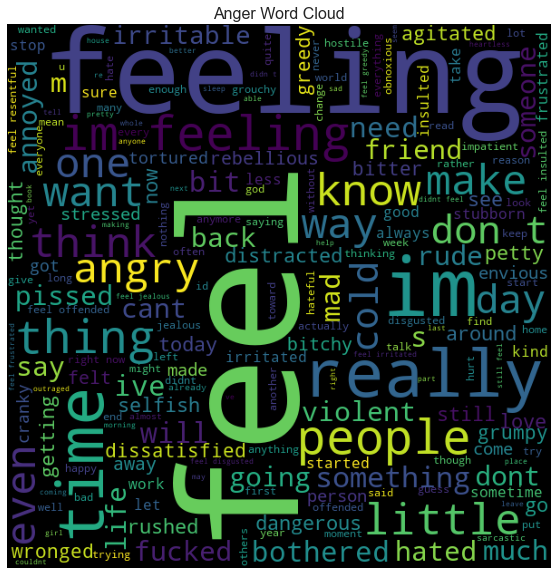

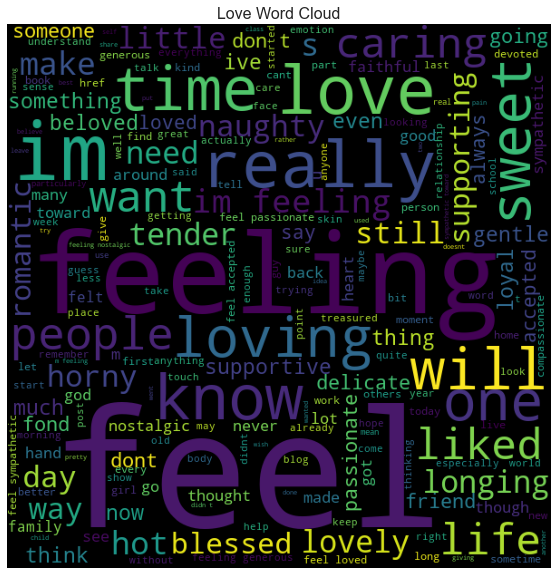

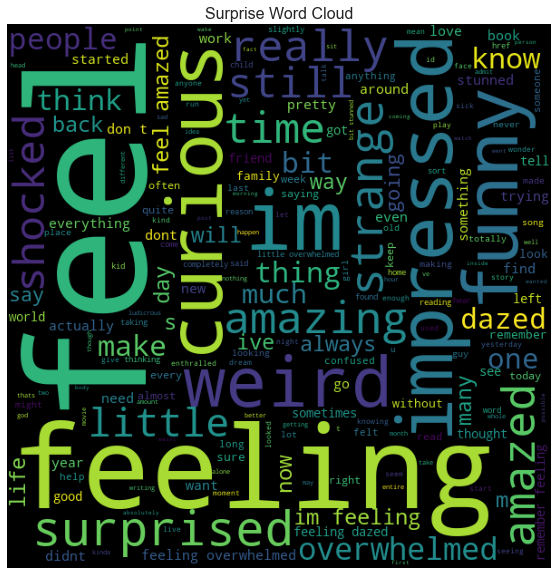

In [134]:
emotions_list = df['Emotions'].unique()

for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotions'] == emotion,'Text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

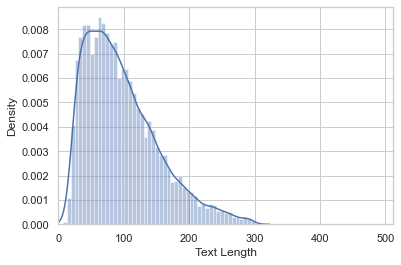

In [135]:
sns.distplot(df_reidx['length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

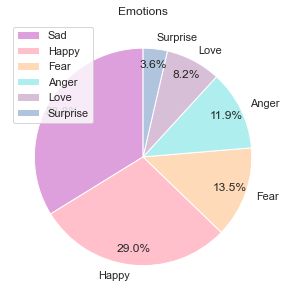

In [136]:
colors = ['plum', 'pink', 'peachpuff','paleturquoise','thistle','lightsteelblue']
# explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Emotions'].value_counts(), colors=colors, labels=emotions_list, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.legend()
plt.title("Emotions")
plt.show()

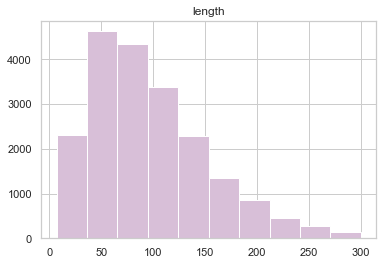

In [137]:
df_reidx.hist(color='thistle') #to draw histogram
plt.show()

**Text Proprocessing**

1. Decontracted
2. Data cleaning
3. Spell check
4. Stop Words Removal
5. Tokenization
6. POS Tagging
7. Stemming
8. Lemmatization

Decontraction: Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Decontracting the contracted words.

DataCleaning: Removing html, xml tags, punctautions, urls, etc.

In [138]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def decontracted(phrase):
    # specific
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    # general
    phrase = re.sub(r"n\ t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase)  
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase)
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)
    
    return phrase

    
def clean_text(df):
    
    cleaned_review = []

    for review_text in tqdm(df['Text']):
        
        # expand the contracted words
        review_text = decontracted(review_text)
        #remove html tags
        review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #remove url 
        review_text = re.sub(r'https?://\S+|www\.\S+', '', review_text)
        
        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        review_text = review_text.translate(str.maketrans('', '', string.punctuation))
        # ''.join([char for char in movie_text_data if char not in string.punctuation])
        
        # remove emails
        review_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', review_text)
    
        cleaned_review.append(review_text)

    return cleaned_review  

df_reidx['Cleaned_Text'] = clean_text(df_reidx)
df_reidx.head(10)  

100%|██████████████████████████████████████████████████████████████████████████| 19998/19998 [00:06<00:00, 3013.87it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,i am feeling rather rotten so i am not very am...
1,im updating my blog because i feel shitty,Sad,41,i am updating my blog because i feel shitty
2,i never make her separate from me because i do...,Sad,97,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...,Happy,113,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one,Sad,47,i was feeling a little vain when i did this one
5,i cant walk into a shop anywhere where i do no...,Fear,66,i can not walk into a shop anywhere where i do...
6,i felt anger when at the end of a telephone call,Anger,48,i felt anger when at the end of a telephone call
7,i explain why i clung to a relationship with a...,Happy,222,i explain why i clung to a relationship with a...
8,i like to have the same breathless feeling as ...,Happy,89,i like to have the same breathless feeling as ...
9,i jest i feel grumpy tired and pre menstrual w...,Anger,159,i jest i feel grumpy tired and pre menstrual w...


**Tokenization:** Splitting sentences into words(tokens).

In [139]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

def tokenize(phrase):
    tokens_list = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    
    for review_text in tqdm(phrase):
        tokens1 = word_tokenize(review_text)
        tokens1 = [word for word in tokens1]
        tokens_list.append(tokens1)
    return tokens_list

df_reidx2 = df.reset_index(drop=True)
df_reidx2['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx2['length'].describe() # info()
df_reidx2['Cleaned_Text'] = tokenize(df_reidx['Cleaned_Text'])
token_list = tokenize(df_reidx['Cleaned_Text'])
df_reidx2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|█████████████████████████████████████████████████████████████████████████| 19998/19998 [00:01<00:00, 11289.28it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,"[i, am, feeling, rather, rotten, so, i, am, no..."
1,im updating my blog because i feel shitty,Sad,41,"[i, am, updating, my, blog, because, i, feel, ..."
2,i never make her separate from me because i do...,Sad,97,"[i, never, make, her, separate, from, me, beca..."
3,i left with my bouquet of red and yellow tulip...,Happy,113,"[i, left, with, my, bouquet, of, red, and, yel..."
4,i was feeling a little vain when i did this one,Sad,47,"[i, was, feeling, a, little, vain, when, i, di..."


**Remove Stopwords:** Words like a,am,the,is,and,or, etc. will be removed.

In [140]:
def remove_stopwords(phrase):
    remove_sw = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    stop_words = stopwords.words('english')
    
    for review_text in tqdm(phrase):
        tokens = word_tokenize(review_text)
        tokens = [word for word in tokens if not word in stop_words]
        remove_sw.append(tokens)
    return remove_sw

df_reidx['Cleaned_Text'] = remove_stopwords(df_reidx['Cleaned_Text'])
df_reidx.head()

100%|██████████████████████████████████████████████████████████████████████████| 19998/19998 [00:02<00:00, 7506.69it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,"[feeling, rather, rotten, ambitious, right]"
1,im updating my blog because i feel shitty,Sad,41,"[updating, blog, feel, shitty]"
2,i never make her separate from me because i do...,Sad,97,"[never, make, separate, ever, want, feel, like..."
3,i left with my bouquet of red and yellow tulip...,Happy,113,"[left, bouquet, red, yellow, tulips, arm, feel..."
4,i was feeling a little vain when i did this one,Sad,47,"[feeling, little, vain, one]"


**POS Tagging:** Identify the Part of Speech of each tokens

In [141]:
def Pos_tagging(phrase):
    postags = []
    for i in range(len(df_reidx['Cleaned_Text'])):
        pos_tagger = nltk.pos_tag(token_list[i])
        postags.append(pos_tagger)
        return postags

df_reidx3 = df.reset_index(drop=True)
df_reidx3['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx3['length'].describe() # info()
res = Pos_tagging(df_reidx['Cleaned_Text'])
res

[[('i', 'NN'),
  ('am', 'VBP'),
  ('feeling', 'VBG'),
  ('rather', 'RB'),
  ('rotten', 'VBN'),
  ('so', 'RB'),
  ('i', 'JJ'),
  ('am', 'VBP'),
  ('not', 'RB'),
  ('very', 'RB'),
  ('ambitious', 'JJ'),
  ('right', 'NN'),
  ('now', 'RB')]]

Now we have the POS tags for every text. There are lots of categories. Here are the meanings:

**NN**: noun (there are other categories that can fit within this one for our purposes, such as NNS, NNP, NNPS, which all belong to nouns, containing plurals and proper names)

**RB**: adverb

**VB**: verb (and similar categories indicating tense: VBP, VBG, VBS..)

**JJ**: adjective or numeral

**Stemming:** Extrating root word by removing the suffixes and prefixes

In [142]:
from nltk.stem import PorterStemmer

def stemming(phrase):
    stemmer = PorterStemmer()
    stem_output=[]
    stemmed=[]
    for review_text in tqdm(phrase):
        stemmed = [stemmer.stem(word) for word in review_text]
        stem_output.append(stemmed)
    return stem_output

df_reidx1 = df.reset_index(drop=True)
df_reidx1['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx1['length'].describe() # info()
df_reidx1['Cleaned_Text'] = stemming(df_reidx['Cleaned_Text'])
df_reidx1.head()

100%|██████████████████████████████████████████████████████████████████████████| 19998/19998 [00:03<00:00, 6401.07it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,"[feel, rather, rotten, ambiti, right]"
1,im updating my blog because i feel shitty,Sad,41,"[updat, blog, feel, shitti]"
2,i never make her separate from me because i do...,Sad,97,"[never, make, separ, ever, want, feel, like, a..."
3,i left with my bouquet of red and yellow tulip...,Happy,113,"[left, bouquet, red, yellow, tulip, arm, feel,..."
4,i was feeling a little vain when i did this one,Sad,47,"[feel, littl, vain, one]"


**Lemmatization:** Extracting root word by refering the dictionary of words.

In [143]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

def lemmatizing(phrase):
    lemmatizer = WordNetLemmatizer()
    lemmated_output=[]
    lemmated=[]
    for review_text in tqdm(phrase):
        lemmated = [lemmatizer.lemmatize(word) for word in review_text]
        lemmated_output.append(lemmated)
    return lemmated_output

df_reidx['Cleaned_Text'] = lemmatizing(df_reidx['Cleaned_Text'])
df_reidx.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████| 19998/19998 [00:00<00:00, 29607.90it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,"[feeling, rather, rotten, ambitious, right]"
1,im updating my blog because i feel shitty,Sad,41,"[updating, blog, feel, shitty]"
2,i never make her separate from me because i do...,Sad,97,"[never, make, separate, ever, want, feel, like..."
3,i left with my bouquet of red and yellow tulip...,Happy,113,"[left, bouquet, red, yellow, tulip, arm, feeli..."
4,i was feeling a little vain when i did this one,Sad,47,"[feeling, little, vain, one]"


In [144]:
def to_sentence(phrase):
    sentence=[]
    for words in tqdm(phrase):
        sentence.append((" ").join(words))
    return sentence
df_reidx['Cleaned_Text']=to_sentence(df_reidx['Cleaned_Text'])
df_reidx.head()

100%|███████████████████████████████████████████████████████████████████████| 19998/19998 [00:00<00:00, 1039569.83it/s]


,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,feeling rather rotten ambitious right
1,im updating my blog because i feel shitty,Sad,41,updating blog feel shitty
2,i never make her separate from me because i do...,Sad,97,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,Happy,113,left bouquet red yellow tulip arm feeling slig...
4,i was feeling a little vain when i did this one,Sad,47,feeling little vain one


In [145]:
df_reidx

,Text,Emotions,length,Cleaned_Text
0,im feeling rather rotten so im not very ambiti...,Sad,59,feeling rather rotten ambitious right
1,im updating my blog because i feel shitty,Sad,41,updating blog feel shitty
2,i never make her separate from me because i do...,Sad,97,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,Happy,113,left bouquet red yellow tulip arm feeling slig...
4,i was feeling a little vain when i did this one,Sad,47,feeling little vain one
...,...,...,...,...
19993,im having ssa examination tomorrow in the morn...,Sad,191,ssa examinatio notomorrow nothe morning quite ...
19994,i constantly worry about their fight against n...,Happy,173,constantly worry fight nature push limit inner...
19995,i feel its important to share this info for th...,Happy,80,feel important share info experience thing
19996,i truly feel that if you are passionate enough...,Happy,105,truly feel passionate enough something stay tr...


**Vector Generation**

In [146]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1),tokenizer = token.tokenize)
x = vectorizer.fit_transform(df_reidx.Cleaned_Text)
y = df_reidx.Emotions

print("X.shape : ",x.shape)
print("y.shape : ",y.shape)

train_idx, test_idx = train_test_split(np.arange(df_reidx.shape[0]), test_size=0.3,shuffle=True, random_state=42)

x_train = x[train_idx]
y_train = y[train_idx]

x_test = x[test_idx]
y_test = y[test_idx]
print("Number of training examples:{}".format(len(train_idx)))
print("Number of testing examples:{}\n".format(len(test_idx)))
print("Training data: X_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Testing data: X_test : {}, y_test : {}".format(x_test.shape, y_test.shape))

X.shape :  (19998, 5247)
y.shape :  (19998,)
Number of training examples:13998
Number of testing examples:6000

Training data: X_train : (13998, 5247), y_train : (13998,)
Testing data: X_test : (6000, 5247), y_test : (6000,)


**Logistic Regression:** Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. 

              precision    recall  f1-score   support

       Anger       0.89      0.87      0.88       835
        Fear       0.87      0.87      0.87       729
       Happy       0.89      0.94      0.92      2020
        Love       0.85      0.73      0.78       487
         Sad       0.92      0.91      0.91      1728
    Surprise       0.86      0.72      0.78       201

    accuracy                           0.89      6000
   macro avg       0.88      0.84      0.86      6000
weighted avg       0.89      0.89      0.89      6000


Accuracy for Logistic Regression Model is: 0.8906666666666667




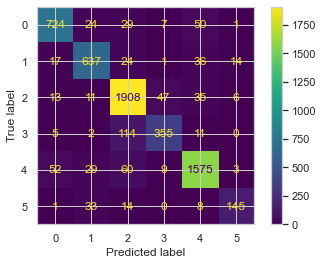

In [147]:
from sklearn import linear_model
lr_clf =  linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')#LogisticRegression()

lr_clf.fit(x_train, y_train)

y_pred_test_lr = lr_clf.predict(x_test)
y_predprob_lr = lr_clf.predict_proba(x_test)
matrix_lr = confusion_matrix(y_test,y_pred_test_lr, )
print(classification_report(y_test, y_pred_test_lr))
print("\nAccuracy for Logistic Regression Model is:",metrics.accuracy_score(y_test, y_pred_test_lr))
print("\n")

y_predict = lr_clf.predict(x_test)
acc_lr = metrics.accuracy_score(y_test, y_pred_test_lr)
matrix_display = ConfusionMatrixDisplay(matrix_lr).plot()

In [148]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [149]:
print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 96.79%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.975329     0.950273     0.965603     0.972147     0.973363   
recall        0.949306     0.953163     0.983330     0.937608     0.978865   
f1-score      0.962142     0.951716     0.974386     0.954566     0.976106   
support    1874.000000  1644.000000  4739.000000  1154.000000  4069.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.967611  0.967924      0.967388      0.967974  
recall       0.922780  0.967924      0.954175      0.967924  
f1-score     0.944664  0.967924      0.960596      0.967850  
support    518.000000  0.967924  13998.000000  13998.000000  
_______________________________________________
Confusion Matrix: 
 [[1779   31   18    0   45    1]
 [  16 1567   24    1   28    8]
 [   7   10 4660   27   32    3]
 [   2    1   67 1082   

**Multinomial Naive Bayes:** The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP).

              precision    recall  f1-score   support

       Anger       0.86      0.79      0.82       835
        Fear       0.80      0.80      0.80       729
       Happy       0.84      0.91      0.87      2020
        Love       0.77      0.57      0.66       487
         Sad       0.84      0.90      0.87      1728
    Surprise       0.78      0.43      0.55       201

    accuracy                           0.83      6000
   macro avg       0.82      0.73      0.76      6000
weighted avg       0.83      0.83      0.83      6000

Accuracy for Multinominal Naive Bayes Model is: 0.8333333333333334




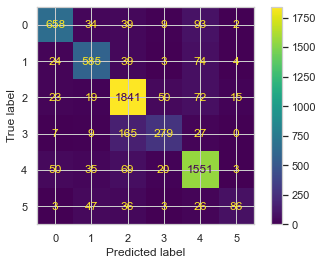

In [150]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred_test_mnb = mnb.predict(x_test)
y_predprob_mnb = mnb.predict_proba(x_test)
matrix_mnb = confusion_matrix(y_test,y_pred_test_mnb)
print(classification_report(y_test, y_pred_test_mnb))
print("Accuracy for Multinominal Naive Bayes Model is:",metrics.accuracy_score(y_test, y_pred_test_mnb))
print("\n")
acc_mnb = metrics.accuracy_score(y_test, y_pred_test_mnb)
matrix_display = ConfusionMatrixDisplay(matrix_mnb).plot()

In [151]:
print_score(mnb, x_train, y_train, x_test, y_test, train=True)
print_score(mnb, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 92.94%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.951801     0.915275     0.922534     0.939484     0.927328   
recall        0.916756     0.900243     0.964972     0.820624     0.969034   
f1-score      0.933949     0.907697     0.943276     0.876041     0.947723   
support    1874.000000  1644.000000  4739.000000  1154.000000  4069.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.972145  0.929418      0.938094      0.930226  
recall       0.673745  0.929418      0.874229      0.929418  
f1-score     0.795895  0.929418      0.900763      0.928144  
support    518.000000  0.929418  13998.000000  13998.000000  
_______________________________________________
Confusion Matrix: 
 [[1718   33   34    2   87    0]
 [  36 1480   40    2   80    6]
 [  18   16 4573   48   82    2]
 [   5    4  178  947   

**Support Vector Machine:** Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

              precision    recall  f1-score   support

       Anger       0.89      0.89      0.89       835
        Fear       0.85      0.88      0.87       729
       Happy       0.90      0.91      0.91      2020
        Love       0.78      0.76      0.77       487
         Sad       0.92      0.91      0.91      1728
    Surprise       0.78      0.73      0.75       201

    accuracy                           0.89      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.88      0.89      0.88      6000


Accuracy for Support Vector Machine Model is: 0.885




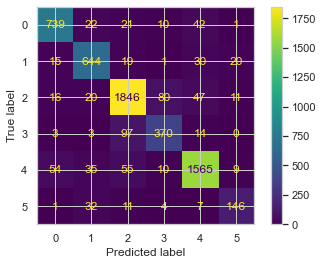

In [152]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(loss='hinge', dual=True)

model_svc.fit(x_train, y_train)
y_pred_test_sv = model_svc.predict(x_test)
matrix_sv = confusion_matrix(y_test,y_pred_test_sv)
print(classification_report(y_test, y_pred_test_sv))
print("\nAccuracy for Support Vector Machine Model is:",metrics.accuracy_score(y_test, y_pred_test_sv))
print("\n")
acc_svm = metrics.accuracy_score(y_test, y_pred_test_sv)
matrix_display = ConfusionMatrixDisplay(matrix_sv).plot()

In [153]:
print_score(model_svc, x_train, y_train, x_test, y_test, train=True)
print_score(model_svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.72%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.983660     0.956161     0.977820     0.973428     0.982297   
recall        0.963714     0.981752     0.986073     0.952340     0.981814   
f1-score      0.973585     0.968788     0.981929     0.962768     0.982055   
support    1874.000000  1644.000000  4739.000000  1154.000000  4069.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.985972  0.977211      0.976556      0.977299  
recall       0.949807  0.977211      0.969250      0.977211  
f1-score     0.967552  0.977211      0.972779      0.977193  
support    518.000000  0.977211  13998.000000  13998.000000  
_______________________________________________
Confusion Matrix: 
 [[1806   28    6    1   33    0]
 [   5 1614    8    0   13    4]
 [   6    7 4673   26   24    3]
 [   1    1   52 1099   

**Decision Tree:** Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

              precision    recall  f1-score   support

       Anger       0.84      0.89      0.87       835
        Fear       0.84      0.85      0.84       729
       Happy       0.89      0.84      0.86      2020
        Love       0.78      0.75      0.77       487
         Sad       0.87      0.90      0.88      1728
    Surprise       0.69      0.80      0.74       201

    accuracy                           0.86      6000
   macro avg       0.82      0.84      0.83      6000
weighted avg       0.86      0.86      0.86      6000


Accuracy for Decision Tree Model is: 0.8553333333333333




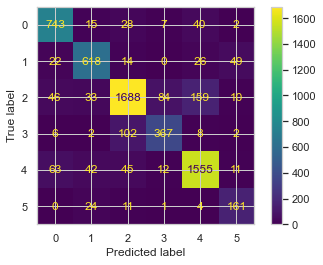

In [154]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(x_train, y_train)

y_pred_test_dt = clf_DT.predict(x_test)
matrix_dt = confusion_matrix(y_test,y_pred_test_dt)
print(classification_report(y_test, y_pred_test_dt))
print("\nAccuracy for Decision Tree Model is:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("\n")
acc_dt = metrics.accuracy_score(y_test, y_pred_test_dt)
matrix_display = ConfusionMatrixDisplay(matrix_dt).plot()

In [155]:
print_score(clf_DT, x_train, y_train, x_test, y_test, train=True)
print_score(clf_DT, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.70%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.995745     0.996949     0.995169     1.000000     0.999016   
recall        0.998933     0.993917     0.999789     0.987868     0.998034   
f1-score      0.997336     0.995431     0.997474     0.993897     0.998525   
support    1874.000000  1644.000000  4739.000000  1154.000000  4069.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.996101     0.997      0.997163      0.997006  
recall       0.986486     0.997      0.994171      0.997000  
f1-score     0.991271     0.997      0.995656      0.996996  
support    518.000000     0.997  13998.000000  13998.000000  
_______________________________________________
Confusion Matrix: 
 [[1872    0    0    0    2    0]
 [   6 1634    1    0    1    2]
 [   0    0 4738    0    1    0]
 [   0    0   14 1140   

**Randon Forest:** Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

              precision    recall  f1-score   support

       Anger       0.87      0.90      0.88       835
        Fear       0.87      0.85      0.86       729
       Happy       0.91      0.91      0.91      2020
        Love       0.82      0.75      0.78       487
         Sad       0.92      0.91      0.92      1728
    Surprise       0.70      0.82      0.75       201

    accuracy                           0.89      6000
   macro avg       0.85      0.86      0.85      6000
weighted avg       0.89      0.89      0.89      6000


Accuracy for Random Forest Model is: 0.8866666666666667




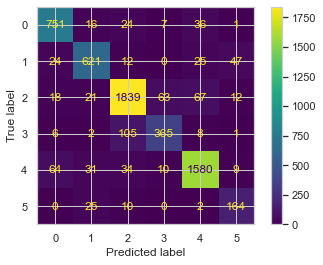

In [156]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=200)
clf_RF.fit(x_train, y_train)

y_pred_test_re = clf_RF.predict(x_test)
matrix_re = confusion_matrix(y_test,y_pred_test_re)
print(classification_report(y_test, y_pred_test_re))
print("\nAccuracy for Random Forest Model is:",metrics.accuracy_score(y_test, y_pred_test_re))
print("\n")
acc_rf = metrics.accuracy_score(y_test, y_pred_test_re)
matrix_display = ConfusionMatrixDisplay(matrix_re).plot()

In [157]:
print_score(clf_RF, x_train, y_train, x_test, y_test, train=True)
print_score(clf_RF, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.70%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.996802     0.997557     0.996420     0.996516     0.998525   
recall        0.997866     0.993309     0.998523     0.991334     0.998525   
f1-score      0.997333     0.995428     0.997470     0.993918     0.998525   
support    1874.000000  1644.000000  4739.000000  1154.000000  4069.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.990366     0.997      0.996031      0.997001  
recall       0.992278     0.997      0.995306      0.997000  
f1-score     0.991321     0.997      0.995666      0.996999  
support    518.000000     0.997  13998.000000  13998.000000  
_______________________________________________
Confusion Matrix: 
 [[1870    1    0    0    3    0]
 [   5 1633    1    0    1    4]
 [   0    0 4732    4    2    1]
 [   0    0   10 1144   

**Model Evaluation**

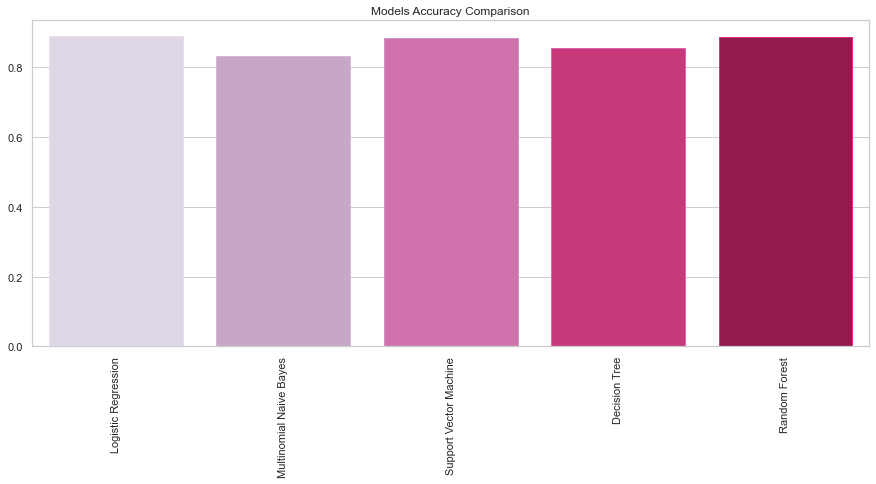

In [158]:
MLA_Name = ['Logistic Regression', 'Multinomial Naive Bayes', 'Support Vector Machine', 'Decision Tree','Random Forest']
MLA_Train_Accuracy = [acc_lr, acc_mnb, acc_svm, acc_dt, acc_rf]
plt.subplots(figsize=(15,6))
sns.barplot(x=MLA_Name, y=MLA_Train_Accuracy,palette='PuRd',edgecolor=sns.color_palette('PuRd',7))
plt.xticks(rotation=90)
plt.title('Models Accuracy Comparison')
plt.show()

**Model Accuracy Comparison**

<table>
  <tr>
    <th>ML Model</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>88.7%</td>
  </tr>
    <td>Multinomial Naive Bayes</td>
    <td>82.75</td>
  </tr>
  <tr>
    <td>Support Vector Machine</td>
    <td>88.22</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>84.9</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>87.92%</td>
  </tr>
</table>



**Logistic Regression is having the highest accuracy that is 88.7% hence it is the most optimal ML Algorithm for Emotion Detection in Test using NLP.**

**Hyperparameter Tuning using GridSearchCV for Logistic Regression**

In [159]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv = GridSearchCV(lr_clf,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print('best paremeters for logistic regression: ', logreg_cv.best_params_)
print('best score for logistic regression after grid search cv:', logreg_cv.best_score_)
acc_logreg = logreg_cv.best_score_

best paremeters for logistic regression:  {'C': 1.0, 'penalty': 'l1'}
best score for logistic regression after grid search cv: 0.8947706525068927


In [160]:
fig = px.bar(x=MLA_Name, y=MLA_Train_Accuracy)
fig.show()

**Emotion Detection:** String/Text is taken as input and the Emotion of the Text will be displayed.

In [161]:
# inp = 'Y'
# while(inp != 'N'):
ip = input('\nEnter a Text: ')
temp = lr_clf.predict(vectorizer.transform([ip]))
print(temp)
#     if(test_result[0] == 'Happy'):
#         print("\nEmotion: Happy\U0001F600")
#     if(test_result[0] == 'Sad'):
#         print("\nEmotion: Sad\N{loudly crying face}")
#     if(test_result[0] == 'Anger'):
#         print("\nEmotion: Anger\N{angry face}")
#     if(test_result[0] == 'Fear'):
#         print("\nEmotion: Fear\N{face screaming in fear}")
#     if(test_result[0] == 'Surprise'):
#         print("\nEmotion: Surprise\N{astonished face}")
#     if(test_result[0] == 'Love'):
#         print("\nEmotion: Love\U0001F970")
#     inp = input("\nDo you want to continue? (Y/N): ")


Enter a Text: good
['Happy']


In [162]:
from joblib import dump

dump(vectorizer, './../savedModules/vectorizer.joblib')
dump(logreg_cv, './../savedModules/module.joblib')

['./../savedModules/module.joblib']